## House Price Prediction using Linear, Ridge and Lasso Regression

# Assignment Part 1

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

## 1. Data Understanding and Exploration

### Import necessary packages and functions

In [880]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### Read file, and show summary

In [881]:
data = pd.read_csv('train.csv')

In [882]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [883]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Exploration

In [884]:
# Drop Id because it has no intrinsic meanings
data = data.drop(['Id'],axis=1)

# Get numerical variables
numericalVars = data.select_dtypes(include=['float64','int64'])
# Drop Id, MSSubClass (categorical variable), month-related and year-related variables are treated as categorical
numericalVars = numericalVars.drop(['MSSubClass','MoSold','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)
numericalVars.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,250000


In [885]:
# Get categorical variables
categoricalVars = data[[var for var in data.columns if var not in numericalVars]]
categoricalVars.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


In [886]:
# Pairwise plot to detect any linear relationship
numericalVars.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [887]:
correlationTable = numericalVars.corr()
correlationTable

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,...,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,...,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856
MasVnrArea,0.193458,0.104160,0.411876,-0.128101,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.239666,-0.046231,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.059119,0.040229,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.308159,-0.136841,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.537808,-0.171098,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.476224,-0.144203,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852


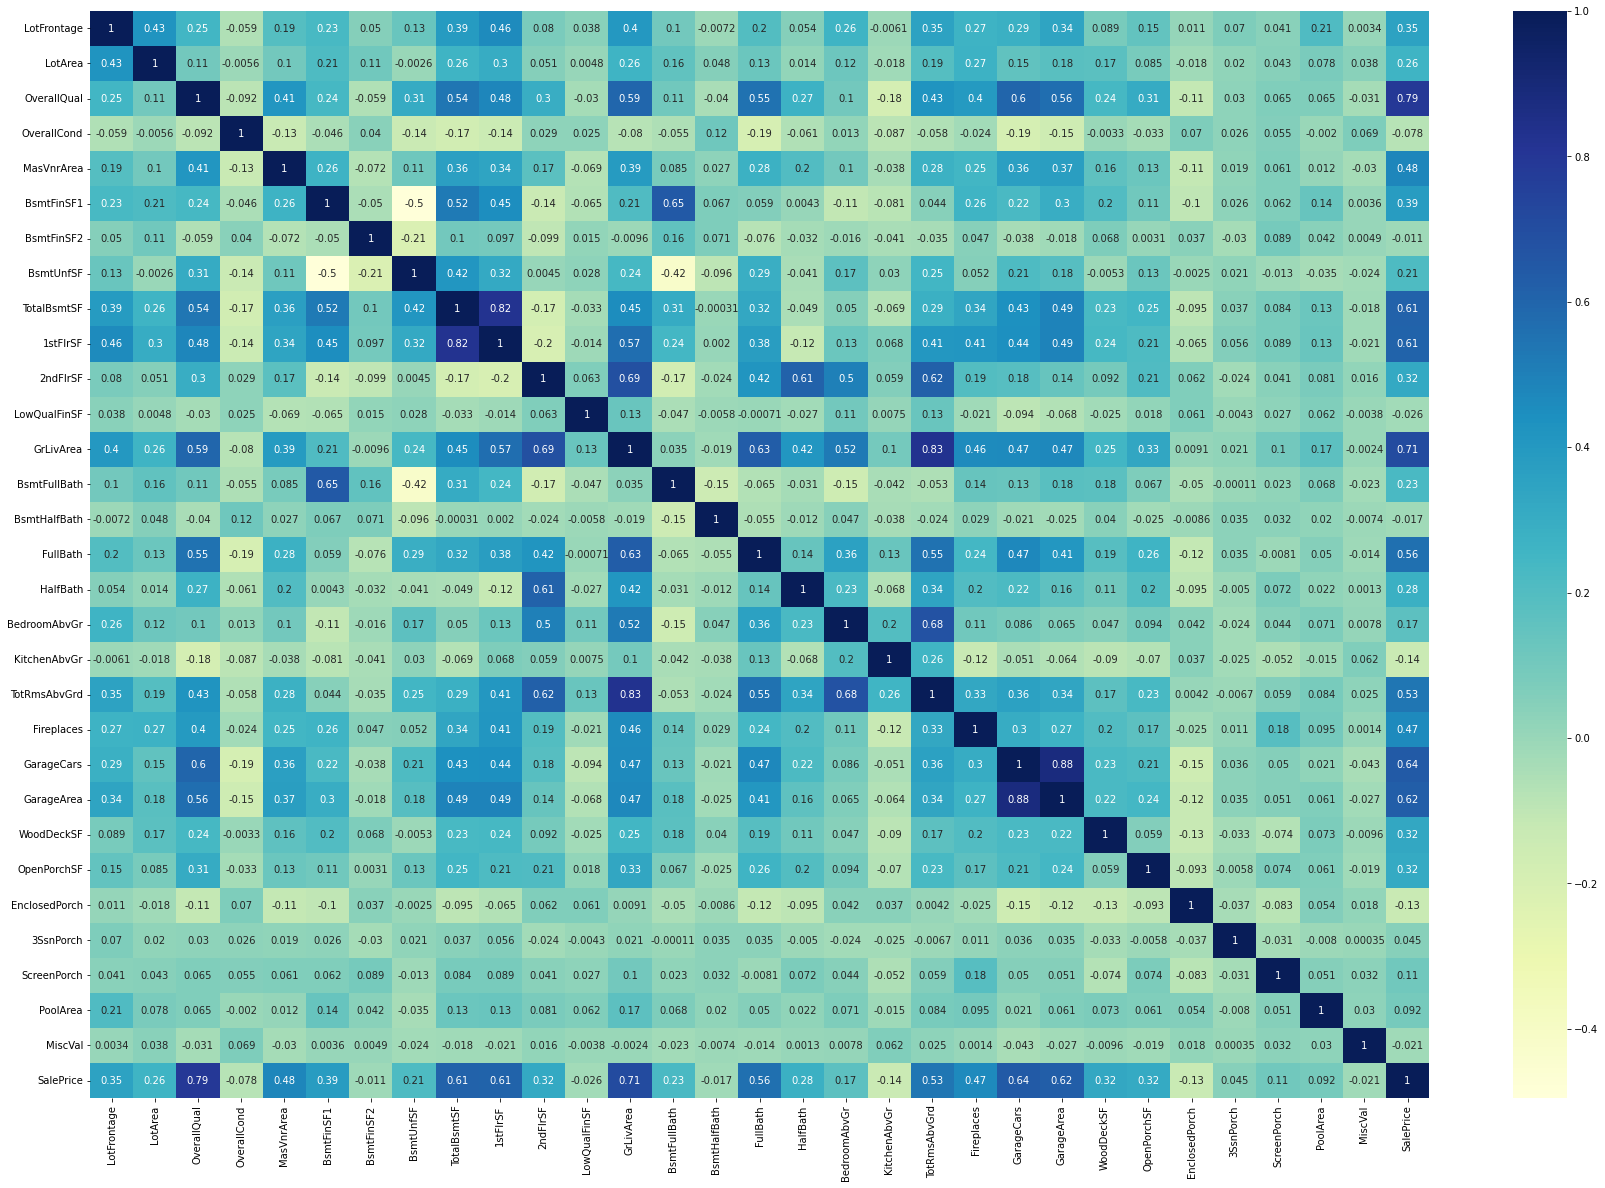

In [888]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(correlationTable,cmap="YlGnBu",annot=True)
plt.show()

### Findings Revealed by Heat Map:

Correlation of price with independent variables:
- Overall Quality (OverallQual), Total square feet of basement area (TotalBsmtSF), First floor square feet (1stFlrSF), Above grade (ground) living area square feet (GrLivArea), Size of garage in car capacity (GarageCars), Size of garage in square feet (GarageArea) have strong (positive) linear relationship with Sale Price (SalePrice)
- Type 2 finished square feet (BsmtFinSF2), Overall condition of the house (OverallCond), Low quality finished square feet on all floors (LowQualFinSF), Basement half bathrooms (BsmtHalfBath), Kitchen above grade (KitchenAbvGr), Enclosed porch area in square feet (EnclosedPorch), $Value of miscellaneous feature (MiscVal), Year Sold (YrSold) only show slightly negative correlation with sale price

Correlation among independent variables:
- Pairs of variables that are strongly related includes: BsmtFullBath - BsmtFinSF1, 1stFlrSF - TotalBsmtSF, TotRmsAbvGrd - GrLivArea, GarageArea - GarageCars

## 2. Data Cleaning

We can see that there are many missing values in some independent variables. As a result, those variables should be treated case by case in the data cleaning steps

### Missing Value Treatment:

In [889]:
# Our first step is to completely eliminate variables having > 30% missing values
rows = data.shape[0]
for var in data.columns.drop('SalePrice'):
    if data[var].isna().sum() > 0.3 * rows:
        data.drop(var,axis=1,inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#### LotFrontage:

In [890]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

The data distributes mostly around its center. Hence, we can replace missing values with the median

In [891]:
m = data['LotFrontage'].median()
data['LotFrontage'] = data['LotFrontage'].fillna(m)

#### MasVnrType:

In [892]:
data['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
5          None
6         Stone
7         Stone
8          None
9          None
10         None
11        Stone
12         None
13        Stone
14      BrkFace
15         None
16      BrkFace
17         None
18         None
19         None
20      BrkFace
21         None
22      BrkFace
23         None
24         None
25        Stone
26         None
27        Stone
28         None
29         None
30         None
31         None
32         None
33         None
34      BrkFace
35        Stone
36         None
37      BrkFace
38         None
39         None
40      BrkFace
41         None
42         None
43         None
44         None
45      BrkFace
46         None
47         None
48         None
49         None
50         None
51         None
52         None
53         None
54         None
55      BrkFace
56      BrkFace
57         None
58      BrkFace
59         None
60         None
61         None
62      

This is an unordered categorical variable and we have no idea to extrapolate its missing values. Hence, the best approach could be simply drop this variable

In [893]:
data = data.drop('MasVnrType',axis=1)

#### MasVnrArea:

In [894]:
data['MasVnrArea'].value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

Majority of its values are 0. As a result, we could replace missing value with 0

In [895]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2:

For all of those variables, as clearly stated in the Data Definition, missing value (NA) means 'No Basement'. We could represent it as 'NoBsmt'

In [896]:
data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('NoBsmt')

#### Electtrical:

In [897]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

This variable has 1 missing value, 'SBrkr' is the most frequent value. We could replace the missing value with 'SBrkr'

In [898]:
data['Electrical'] = data['Electrical'].fillna('SBrkr')

 #### GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond:

For all of those variables, as clearly stated in the Data Definition, missing value (NA) means 'No Garage'. We could represent it as 'NoGarage'

In [899]:
data[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = data[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']].fillna('NoGarage')

In [900]:
# We can see there are no longer missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## 3. Data Preparation

#### Predictors:

In [901]:
X = data[data.columns.drop('SalePrice')]
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


#### Target:

In [902]:
y = data['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

#### Categorical predictors:

In [903]:
# Subset categorical variables. Regard months, years as categorical:
X_categorical = X.select_dtypes('object')
X_categorical = pd.concat([X_categorical,X[['MoSold','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].astype('object')],axis=1)
X_categorical.head()
X_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [904]:
# Convert rategorical variables to dummy variables:
X_dummies = pd.get_dummies(X_categorical,drop_first=True)
X_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_NoGarage,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [905]:
# Drop categorial variables, concat the result with dummies:
X = X.drop(X_categorical.columns,axis=1)
X = pd.concat([X, X_dummies], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_NoGarage,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,0,0,1,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,0,0,0,1,0,0


#### Numerical predictors:


In [906]:
# Subset numerical predictors
X_numerical = data[[var for var in X.columns if var not in X_dummies.columns]]
X_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,2,548,0,61,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,1,2,460,298,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,1,2,608,0,42,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,1,3,642,0,35,272,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,1,3,836,192,84,0,0,0,0,0


### Scaling

In [907]:
# Scale all variables
X = pd.DataFrame(scale(X),columns=X.columns)
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_NoGarage,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-8.455945e-17,2.798370e-16,-5.840077e-17,1.387018e-16,3.540547e-16,-3.893385e-17,-2.433366e-17,-3.406712e-17,-6.600504e-17,2.457699e-16,...,3.041707e-17,1.216683e-17,-5.840077e-17,2.920039e-17,1.460019e-17,-5.475072e-17,-2.190029e-17,-4.380058e-17,-9.733462e-18,-2.920039e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-8.725628e-01,-2.219047e+00,-9.237292e-01,-3.688413e+00,-4.112970e+00,-5.707501e-01,-9.730182e-01,-2.886528e-01,-1.284176e+00,-2.411167e+00,...,-2.052140e-01,-1.863522e-01,-1.423571e-01,-1.208034e-01,-4.537649e-02,-2.423597e-01,-5.393450e-01,-5.128116e-01,-5.488604e-01,-3.690349e-01
25%,-8.725628e-01,-4.479400e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.707501e-01,-9.730182e-01,-2.886528e-01,-7.793259e-01,-5.966855e-01,...,-2.052140e-01,-1.863522e-01,-1.423571e-01,-1.208034e-01,-4.537649e-02,-2.423597e-01,-5.393450e-01,-5.128116e-01,-5.488604e-01,-3.690349e-01
50%,-1.631095e-01,-3.922314e-02,-1.040633e-01,-7.183611e-02,-5.171998e-01,-5.707501e-01,-1.319022e-01,-2.886528e-01,-2.031633e-01,-1.503334e-01,...,-2.052140e-01,-1.863522e-01,-1.423571e-01,-1.208034e-01,-4.537649e-02,-2.423597e-01,-5.393450e-01,-5.128116e-01,-5.488604e-01,-3.690349e-01
75%,3.098594e-01,4.149067e-01,1.087080e-01,6.514792e-01,3.817427e-01,3.383686e-01,5.891327e-01,-2.886528e-01,5.450557e-01,5.491227e-01,...,-2.052140e-01,-1.863522e-01,-1.423571e-01,-1.208034e-01,-4.537649e-02,-2.423597e-01,-5.393450e-01,-5.128116e-01,-5.488604e-01,-3.690349e-01
max,3.147673e+00,1.104155e+01,2.051827e+01,2.821425e+00,3.078570e+00,8.285201e+00,1.140575e+01,8.851638e+00,4.004295e+00,1.152095e+01,...,4.872962e+00,5.366183e+00,7.024587e+00,8.277911e+00,2.203785e+01,4.126099e+00,1.854101e+00,1.950034e+00,1.821957e+00,2.709771e+00


In [908]:
# Scale response variable
y = pd.Series(scale(y),name='SalePrice')

#### Split into train / test sets

In [909]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=1)

## 4. Model building and Evaluation

### Linear Regression

In [910]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
print(lm.coef_)

-82142554598.55305
[-4.79519647e-02  1.71741936e-02  9.69819846e-02  6.10029924e-02
  8.70639339e-02  1.91272367e-02  2.25291419e+12  7.96842797e+11
  2.18261894e+12 -2.16700194e+12 -1.58673721e+12 -1.79171723e+12
 -1.99571908e+11  2.15681770e+12 -1.85680307e-03  1.56836976e-02
  3.27275332e-02  3.90390526e-02 -7.80125831e-03 -2.66257553e-02
 -1.12796516e-02  3.53144022e-02  1.48224090e-02  1.00154599e-01
  2.99958863e-02 -2.26404309e-03  7.66819439e-03  9.71603001e-03
  2.42828832e-02  5.17450707e-02  3.76864542e-03  1.82735484e-02
  5.40434079e-03 -6.80541992e-03 -1.50756836e-02 -8.29792023e-03
  7.06481934e-03  7.32421875e-03  1.99127197e-02  6.58569336e-02
 -1.33514404e-02  7.94677734e-02 -2.25830078e-02  1.69067383e-02
 -1.78318024e-02 -1.74560547e-02 -1.09558105e-02  4.24194336e-03
 -6.00585938e-02 -3.20434570e-03 -1.56860352e-02 -6.37054443e-02
 -3.34124565e-02 -6.76879883e-02 -1.38549805e-02 -1.16638184e-01
 -6.53991699e-02 -7.83081055e-02 -1.71813965e-02 -6.13098145e-02
 -1.39

In [911]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.949352219452476
-2.5532228728465583e+25
48.74178435471811
1.2661092879148757e+28
0.04773925989688356
2.890660474691497e+25


We can see that the model cannot generalize to unseen data. This suggests that our model is overfitting. Hence, we will do Ridge and Lasso Regression to counter this issue

### Ridge Regression

In [912]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 2000, 5000]}

ridge = Ridge()
# cross validation
model_cv = GridSearchCV(
    estimator = ridge, 
    param_grid = params, 
    scoring = 'neg_mean_absolute_error', 
    cv = 5, 
    return_train_score = True,
    verbose = 1
)            
model_cv.fit(X_train, y_train)
# show best model's alpha
model_cv.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'alpha': 500}

In [913]:
# Fit the model with alpha = 500
ridge = Ridge(alpha=500)
ridge.fit(X_train, y_train)
# Show model coefficients
ridge.coef_

array([-2.84941084e-02, -2.79274578e-03,  4.14068199e-02,  9.64961876e-02,
        3.70599250e-02,  5.15801584e-02,  2.42938472e-02,  1.06061690e-02,
        5.22665441e-03,  3.44213800e-02,  5.81702107e-02,  4.20961704e-02,
        2.49705872e-03,  7.79962137e-02,  2.12677571e-02,  3.92496723e-03,
        5.05974464e-02,  2.43262284e-02,  1.03149179e-02, -1.99903289e-02,
        6.29427440e-02,  4.78788259e-02,  6.31237185e-02,  4.81507030e-02,
        3.41181101e-02,  1.78321971e-02,  5.45771148e-03,  6.91312665e-03,
        2.90136906e-02, -2.28038442e-02, -2.35983849e-04,  2.27873253e-03,
        1.97331697e-03,  2.06526920e-02, -2.01771632e-02, -5.27719687e-04,
        1.26138385e-02, -2.53453878e-02, -5.75855633e-03,  2.06412292e-02,
       -3.03857957e-03,  2.30748647e-02, -1.35093450e-02,  2.15148760e-02,
       -9.73676897e-03, -3.74525598e-03, -5.48426004e-03,  1.50993295e-02,
       -1.31507752e-03,  1.21259241e-03, -4.20556819e-03,  2.44569055e-04,
       -8.31011264e-04, -

In [914]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8951440429581795
0.8454967038349338
100.90997850625175
76.616131074355
0.0988344549522544
0.174922673685742


### Lasso Regression

In [915]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(
    estimator = lasso, 
    param_grid = params, 
    scoring = 'neg_mean_absolute_error', 
    cv = 5, 
    return_train_score = True,
    verbose = 1
)
model_cv.fit(X_train, y_train) 
# show best model's alpha
model_cv.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'alpha': 0.01}

In [916]:
# Fitting Lasso model for alpha = 0.01
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
# Show model coefficients 
lasso.coef_ 

array([-7.64007886e-02, -4.30378904e-03,  4.92645790e-02,  1.90931392e-01,
        5.04501401e-02,  3.98066545e-02,  3.51172208e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  9.20753947e-03,  0.00000000e+00,
       -0.00000000e+00,  2.44336849e-01,  2.92181642e-02,  0.00000000e+00,
        3.82688178e-02,  0.00000000e+00, -0.00000000e+00, -2.71370655e-02,
        3.52686203e-02,  3.40588898e-02,  1.14898321e-01,  0.00000000e+00,
        2.94725469e-02,  7.16638785e-03,  0.00000000e+00,  0.00000000e+00,
        2.44680199e-02, -2.07554475e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.78312853e-02, -0.00000000e+00,
        6.87270245e-03, -2.16805921e-02, -0.00000000e+00,  1.83473359e-02,
        0.00000000e+00,  3.65534875e-02, -1.20543166e-02,  3.21233148e-02,
       -0.00000000e+00, -2.56425768e-04, -0.00000000e+00,  1.25753670e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [917]:
# Calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.894757200418737
0.857254590928122
101.28226324277736
70.78555113820437
0.09919908251006597
0.16161084734749856


# Model Performance Evaluation

In [918]:
lr_table = {
    'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'],
    'Linear Regression': metric,
    'Ridge Regression': metric2,
    'Lasso Regression': metric3,
}
final_metric = pd.DataFrame(lr_table).set_index('Metric')
final_metric

,Linear Regression,Ridge Regression,Lasso Regression
Metric,,,
R2 Score (Train),9.493522e-01,0.895144,0.894757
R2 Score (Test),-2.553223e+25,0.845497,0.857255
RSS (Train),4.874178e+01,100.909979,101.282263
RSS (Test),1.266109e+28,76.616131,70.785551
MSE (Train),2.184932e-01,0.314379,0.314959
MSE (Test),5.376486e+12,0.418238,0.402009


The R2_square of Ridge Regression and Lasso Regression between train and test set are almost the same. We can be confident that the models are not overfitting

# Coefficient Changes

In [919]:
betas = pd.DataFrame(index=X.columns)
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Linear,Ridge,Lasso
MSSubClass,-4.795196e-02,-2.849411e-02,-7.640079e-02
LotFrontage,1.717419e-02,-2.792746e-03,-4.303789e-03
LotArea,9.698198e-02,4.140682e-02,4.926458e-02
OverallQual,6.100299e-02,9.649619e-02,1.909314e-01
OverallCond,8.706393e-02,3.705993e-02,5.045014e-02
MasVnrArea,1.912724e-02,5.158016e-02,3.980665e-02
BsmtFinSF1,2.252914e+12,2.429385e-02,3.511722e-03
BsmtFinSF2,7.968428e+11,1.060617e-02,0.000000e+00
BsmtUnfSF,2.182619e+12,5.226654e-03,-0.000000e+00
TotalBsmtSF,-2.167002e+12,3.442138e-02,0.000000e+00


# --------------------------------------------------------

# Assignment Part 2

## Question 1

In [920]:
most_important_variables = betas.loc[betas['Lasso'].abs()>=0.1,'Lasso']
most_important_variables

OverallQual             0.190931
GrLivArea               0.244337
GarageCars              0.114898
Neighborhood_NridgHt    0.130387
RoofMatl_WdShngl        0.107944
Name: Lasso, dtype: float64

## Question 3

In [921]:
# Drop 5 most important 
X = X.drop(most_important_variables.sort_values(ascending=False).index[:5],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=1)

In [922]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(
    estimator = lasso, 
    param_grid = params, 
    scoring = 'neg_mean_absolute_error', 
    cv = 5, 
    return_train_score = True,
    verbose = 1
)            
model_cv.fit(X_train, y_train) 
# show best model's alpha
model_cv.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'alpha': 0.01}

In [923]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [924]:
betas = pd.DataFrame(index=X.columns)
betas['Lasso'] = lasso.coef_
betas.sort_values('Lasso',ascending=False)[:5]

,Lasso
1stFlrSF,0.176024
2ndFlrSF,0.152979
GarageArea,0.115406
FullBath,0.088858
TotRmsAbvGrd,0.081902
